# Advance Lane Lines Project

This jupyter notebook contains all of the code used in the implementation of the Advance Lane Lines project. The purpose of this project is to correctly identify lanes on a road and their curvature. This is essential information for self-driving cars when calculating steering angles. 

The steps followed in this project are the following:
- Camera Calibration
- Distortion correction
- Color/gradient threshold
- Perspective transform
- Detect lane lines
- Determine the lane curvature

We will use this first cell to go ahead and import all of the libraries that we will need throughout this project. 

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

The output of this project will be a video with the detected lanes overlaid. The next cell shows the first frame of the input video. We will apply our pipeline to identify lanes to each frame. We will use this first frame as an example throughout the notebook to illustrate what the pipeline is doing. 


This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


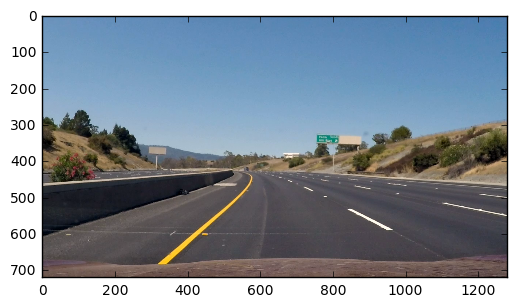

In [16]:
vidcap = cv2.VideoCapture('project_video.mp4')
success,frame1 = vidcap.read()
count = 0
success = True

plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.show()

# Camera Calibration

To calibrate the camera we will use a function provided by OpenCV. 


**`cv2.calibrateCamera(objp, imgp, img_size, None, None)`**

This function takes in objectPoints and imagePoints as the first two parameters. Each of these is a vector of vectors of calibration pattern points in the calibration pattern coordinate space. For further information look at the [OpenCV documentation](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html)

To obtain the objectPoints and imagePoints we will use the finding chessboard corners technique implemented in the next couple of cells. The image points are returned by the **`findChessboardCorners`** function also from OpenCV.

In [7]:
# checkerboard Dimensions
cbrow = 6
cbcol = 9

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((cbrow * cbcol, 3), np.float32)
objp[:, :2] = np.mgrid[0:cbcol, 0:cbrow].T.reshape(-1, 2)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (cbcol, cbrow), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

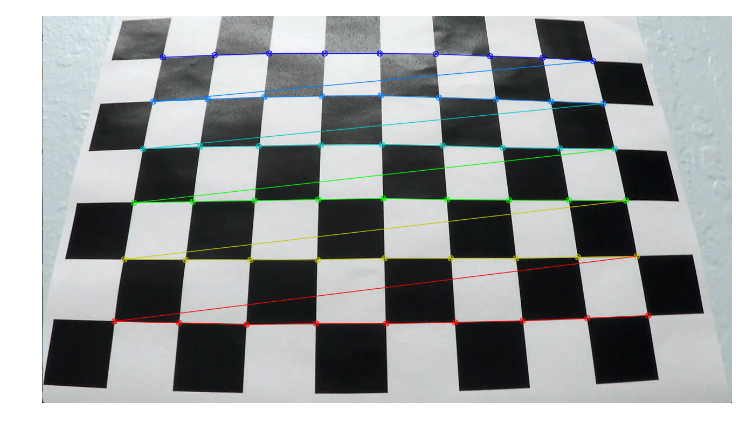

In [9]:
# Lets print one example of the found corners
img = cv2.imread("camera_cal/calibration3.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
cv2.drawChessboardCorners(img, (9, 6), corners, ret)

plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off");
plt.show()

In [ ]:
The output of the cell above shows

In [10]:
def undistort_image(img, objp, imgp):
    """
    Undistort and image based on the provided camera calibration factors.
    
    :param img:
        Image (RGB)
        
    :param objp:
        Object points calibration factors
        
    :param imgp:
        Image points calibration factors
        
    :return:
        Undistorted image
    """
    
    img_size = (img.shape[1], img.shape[0])
    
    # Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp, imgp, img_size, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

In [11]:

def warp_image(img, src, dst, image_size):
    """
    Apply perspective transformation on the provided image to gain a birds-eye-view,
    based on the source and destination image points.
    
    :param img:
        Image to transform
        
    :param: src:
        Source coordinates
        
    :param dst:
        Destination coordinates
        
    :param image_size:
        Image shape as (width, height)
        
    :returns:
        Tuple of the warped image, the transform matrix and inverse transform matrix
    """
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, image_size, flags=cv2.INTER_LINEAR)
    Minv = cv2.getPerspectiveTransform(dst, src)

    return warped, M, Minv

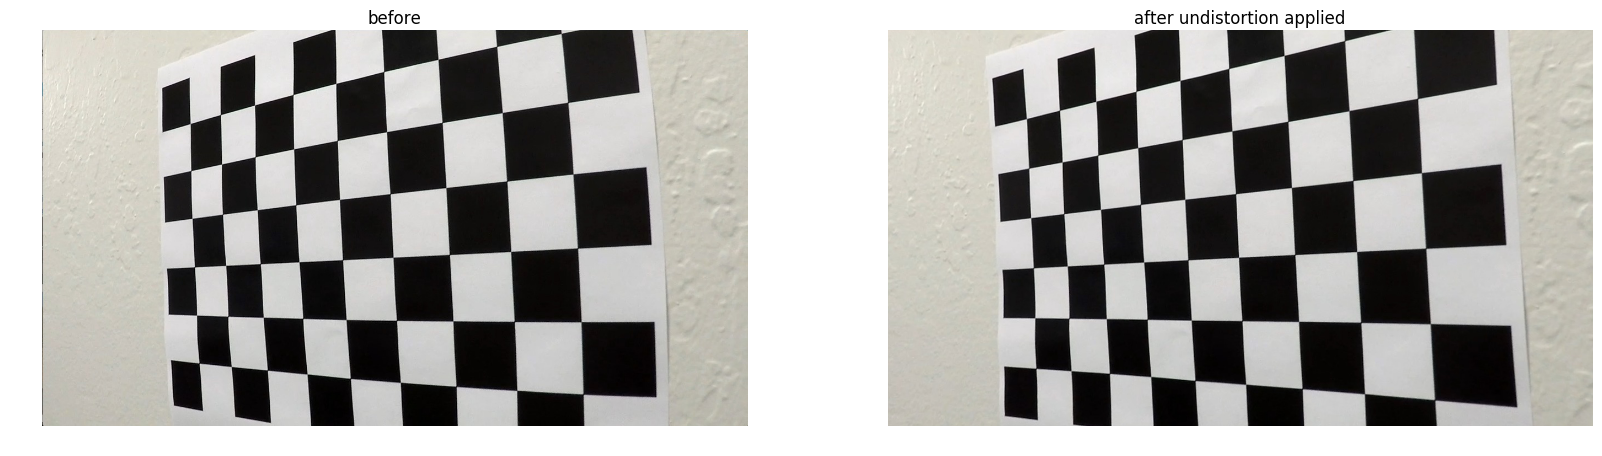

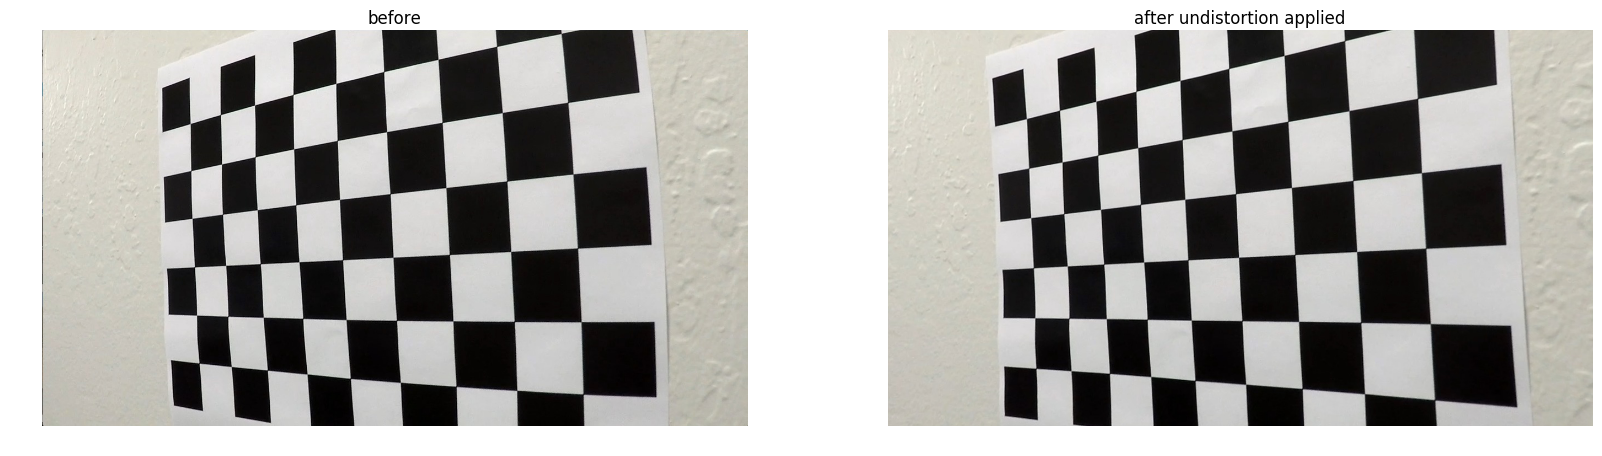

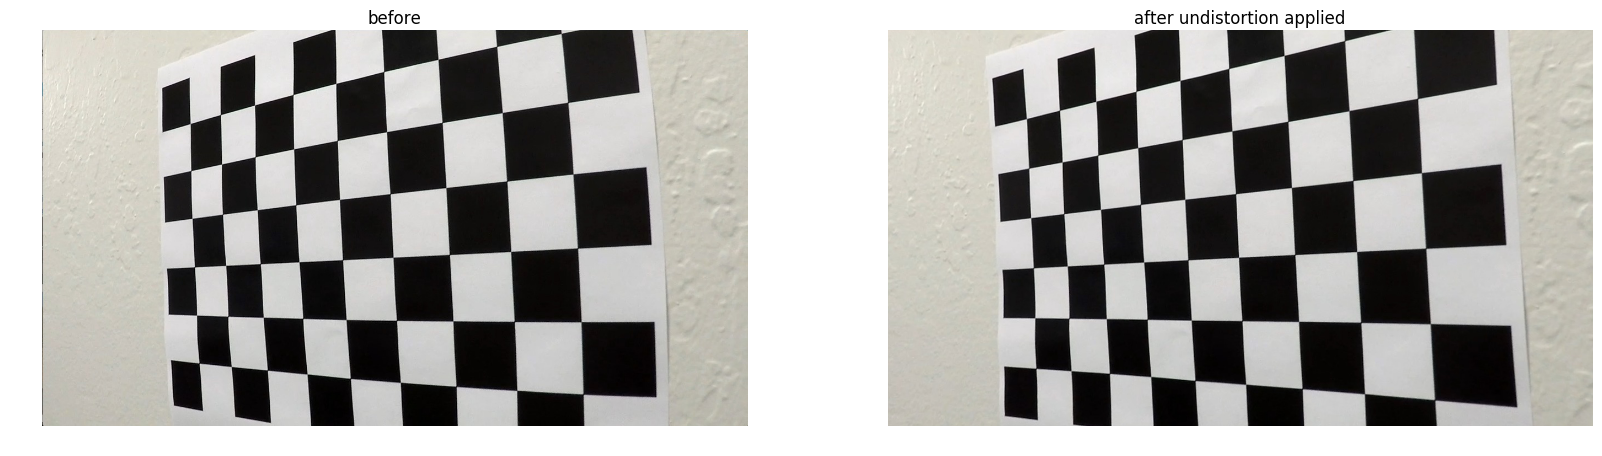

In [14]:
# Test undistortion on an image
img = cv2.imread("camera_cal/calibration4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst = undistort_image(img, objpoints, imgpoints)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("before")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title("after undistortion applied");
plt.axis("off")
plt.show()

#write_image(dst, "output_images/camera_calibration.jpg")